In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from dateutil.parser import parse
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
international_flight_2020 = pd.read_csv('data/international_flight_2020.csv')

In [3]:
international_flight_2020['count'] = [1] * international_flight_2020.shape[0]

In [4]:
international_flight_2020_combin = international_flight_2020.groupby(by = ['day', "origin", "destination"], as_index=False).sum()

In [5]:
international_flight_2020_data = international_flight_2020_combin[['day', 'origin', 'destination', 'count']]

In [6]:
international_flight_2020_data['day'] = international_flight_2020_data['day'].apply(lambda x: parse(x).date())
international_flight_2020_data['Date'] = international_flight_2020_data['day'].apply(lambda x: (x.strftime('%Y-%m-%d')))

C:\Users\WEI YUAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\WEI YUAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
international_flight_2020_data.head()

,day,origin,destination,count,Date
0,2020-01-01,01FA,02PR,1,$Y-01-01
1,2020-01-01,01FA,SKBO,1,$Y-01-01
2,2020-01-01,19TE,MROC,1,$Y-01-01
3,2020-01-01,22CO,EGLL,1,$Y-01-01
4,2020-01-01,74XA,7OK0,1,$Y-01-01


In [8]:
G = nx.from_pandas_edgelist(international_flight_2020_data,source = 'origin', target = 'destination', edge_attr=["count", "Date"])


In [9]:
def build_daily_graph(df, days):
    graph_list = []
    for day in days:
        cur_day_flights = df[df['day'] == day]
        directed_G = nx.from_pandas_edgelist(cur_day_flights,source = 'origin', target = 'destination', edge_attr=["count", "Date"],create_using=nx.DiGraph())
        graph_list.append(directed_G)
    return graph_list

In [10]:
days = set(international_flight_2020_data['day'])

graph_list = build_daily_graph(international_flight_2020_data, days)

In [11]:
def find_SCC_isolate_number(graph_list):
    number_SCC_list = []
    number_isolate_list = []
    for graph in graph_list:
        number_SCC_list.append(nx.number_strongly_connected_components(graph))
        number_isolate_list.append(nx.number_of_isolates(graph))
    return number_SCC_list, number_isolate_list

In [26]:
number_SCC_list, number_isolate_list = find_SCC_isolate_number(graph_list)

(0, 1000)

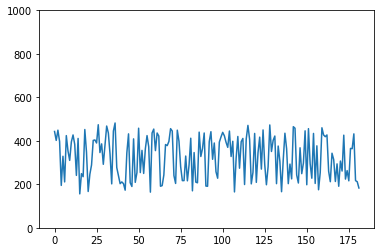

In [13]:
plt.plot(number_SCC_list)
plt.ylim(0,1000)

In [15]:
international_flight_2019 = pd.read_csv('data/international_flight_2019.csv')

In [16]:
international_flight_2019['count'] = [1] * international_flight_2019.shape[0]
international_flight_2019_combin = international_flight_2019.groupby(by = ['day', "origin", "destination"], as_index=False).sum()
international_flight_2019_data = international_flight_2019_combin[['day', 'origin', 'destination', 'count']]
international_flight_2019_data['day'] = international_flight_2019_data['day'].apply(lambda x: parse(x).date())
international_flight_2019_data['Date'] = international_flight_2019_data['day'].apply(lambda x: (x.strftime('%Y-%m-%d')))

C:\Users\WEI YUAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\WEI YUAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [17]:
international_flight_2019_data.head()

,day,origin,destination,count,Date
0,2019-01-01,02XS,EGLL,1,$Y-01-01
1,2019-01-01,57FA,EGCC,1,$Y-01-01
2,2019-01-01,57FA,SBBR,1,$Y-01-01
3,2019-01-01,57FA,SBKP,1,$Y-01-01
4,2019-01-01,57FA,SKBO,1,$Y-01-01


In [18]:
G_2019 = nx.from_pandas_edgelist(international_flight_2019_data,source = 'origin', target = 'destination', edge_attr=["count", "Date"])


In [22]:
days = set(international_flight_2019_data['day'])

graph_list_2019 = build_daily_graph(international_flight_2019_data, days)

In [25]:
number_SCC_list_2019, number_isolate_list = find_SCC_isolate_number(graph_list_2019)

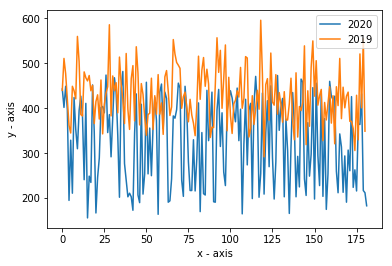

In [30]:
# line 1 points
# plotting the line 1 points 
plt.plot(number_SCC_list, label = "2020")
# line 2 points
# plotting the line 2 points 
plt.plot(number_SCC_list_2019, label = "2019")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [46]:
number_SCC_list_Jan = number_SCC_list[:31]
number_SCC_list_Feb = number_SCC_list[31:31+29]
number_SCC_list_Mar = number_SCC_list[31+29:31+29+31]
number_SCC_list_Apr = number_SCC_list[31+29+31:31+29+31+30]
number_SCC_list_May = number_SCC_list[31+29+31+30: 31+29+31+30+31]
number_SCC_list_Jun = number_SCC_list[31+29+31+30+31:31+29+31+30+31+30]

In [49]:
number_SCC_list_Jan_avg = sum(number_SCC_list_Jan)/len(number_SCC_list_Jan)
number_SCC_list_Feb_avg = sum(number_SCC_list_Feb)/len(number_SCC_list_Feb)
number_SCC_list_Mar_avg = sum(number_SCC_list_Mar)/len(number_SCC_list_Mar)
number_SCC_list_Apr_avg = sum(number_SCC_list_Apr)/len(number_SCC_list_Apr)
number_SCC_list_May_avg = sum(number_SCC_list_May)/len(number_SCC_list_May)
number_SCC_list_Jun_avg = sum(number_SCC_list_Jun)/len(number_SCC_list_Jun)

In [50]:
number_SCC_list_2019_Jan = number_SCC_list_2019[:31]
number_SCC_list_2019_Feb = number_SCC_list_2019[31:31+28]
number_SCC_list_2019_Mar = number_SCC_list_2019[31+28:31+28+31]
number_SCC_list_2019_Apr = number_SCC_list_2019[31+28+31:31+28+31+30]
number_SCC_list_2019_May = number_SCC_list_2019[31+28+31+30: 31+28+31+30+31]
number_SCC_list_2019_Jun = number_SCC_list_2019[31+28+31+30+31:31+28+31+30+31+30]

In [51]:
number_SCC_list_2019_Jan_avg = sum(number_SCC_list_2019_Jan)/len(number_SCC_list_2019_Jan)
number_SCC_list_2019_Feb_avg = sum(number_SCC_list_2019_Feb)/len(number_SCC_list_2019_Feb)
number_SCC_list_2019_Mar_avg = sum(number_SCC_list_2019_Mar)/len(number_SCC_list_2019_Mar)
number_SCC_list_2019_Apr_avg = sum(number_SCC_list_2019_Apr)/len(number_SCC_list_2019_Apr)
number_SCC_list_2019_May_avg = sum(number_SCC_list_2019_May)/len(number_SCC_list_2019_May)
number_SCC_list_2019_Jun_avg = sum(number_SCC_list_2019_Jun)/len(number_SCC_list_2019_Jun)

In [52]:
number_SCC_list_2019_avg = [number_SCC_list_2019_Jan_avg, number_SCC_list_2019_Feb_avg, number_SCC_list_2019_Mar_avg, number_SCC_list_2019_Apr_avg, number_SCC_list_2019_May_avg, number_SCC_list_2019_Jun_avg]
number_SCC_list_2020_avg = [number_SCC_list_Jan_avg, number_SCC_list_Feb_avg, number_SCC_list_Mar_avg, number_SCC_list_Apr_avg, number_SCC_list_May_avg, number_SCC_list_Jun_avg]

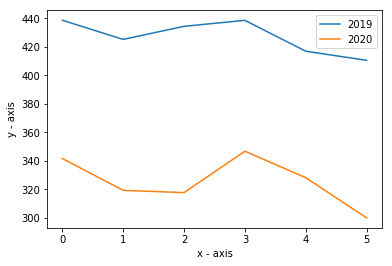

In [54]:
# line 1 points
# plotting the line 1 points 
plt.plot(number_SCC_list_2019_avg, label = "2019")
# line 2 points
# plotting the line 2 points 
plt.plot(number_SCC_list_2020_avg, label = "2020")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()